In [165]:
#
# Author: Peter J. Yu 2023
#
import numpy as np
import pandas as pd
import os
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import netCDF4
import math
import matplotlib as mpl
from colorspacious import cspace_converter

from mpl_toolkits.basemap import Basemap
from itertools import chain

import warnings
warnings.filterwarnings('ignore')

In [166]:
def get_data(file_name, z_lowerbound, z_upperbound):
    with open(file_name, 'r') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        y = [float(line.split()[1]) for line in lines]
        z = [float(line.split()[2]) for line in lines]
    
    newx = []
    newy = []
    newz = []

    for x_value, y_value, z_value in zip(x, y, z):
        if z_lowerbound <= z_value <= z_upperbound:
            newx.append(x_value)
            newy.append(y_value)
            newz.append(z_value)
    x = newx
    y = newy
    z = newz
    
    return x,y,z

In [167]:
# Ovalish Map
def moll_map(x_coord, y_coord, z_coord, title, measurement_unit, file_save_name, palette='nipy_spectral'):
    fig = plt.figure(figsize=(15, 10), edgecolor='black')
    
    m = Basemap(projection='moll',lat_0=0, lon_0=0,resolution=None)
    m.drawmapboundary(fill_color='white')
    m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2], color='black')
    m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,False],dashes=[2,2], color='black')
    m.shadedrelief(scale=0.2)
    x_coord, y_coord = m(x_coord, y_coord)
    
    plt.title(title, fontsize=25, fontweight=40)
    plt.scatter(x_coord,y_coord,s=3,c=z_coord, cmap=palette) # Change cmap for a different palette
    cbar=plt.colorbar(orientation='horizontal',fraction=0.046, pad=0.04)
    cbar.set_label(measurement_unit, fontsize=15)
    plt.gca().set_aspect('equal')
    plt.savefig(file_save_name)
    
# Rectangular map
def cyl_map(x_coord, y_coord, z_coord, title, measurement_unit, file_save_name, palette):
    fig = plt.figure(figsize=(15, 10))
    
    m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
    
    parallels = np.arange(-90.,91.,30.)
    meridians = np.arange(-180.,181.,60.)
    m.drawparallels(parallels,labels=[True, False, False, True], linewidth=0)
    m.drawmeridians(meridians,labels=[True,False,False,True], linewidth=0)
    m.shadedrelief(scale=0.2)
    
    plt.title(title, fontsize=25, fontweight=40)
    plt.scatter(x_coord,y_coord,s=3,c=z_coord, cmap='nipy_spectral') # Change cmap for a different palette
    cbar=plt.colorbar(orientation='horizontal',fraction=0.046, pad=0.04)
    cbar.set_label(measurement_unit, fontsize=15)
    plt.gca().set_aspect('equal')
    plt.savefig(file_save_name)

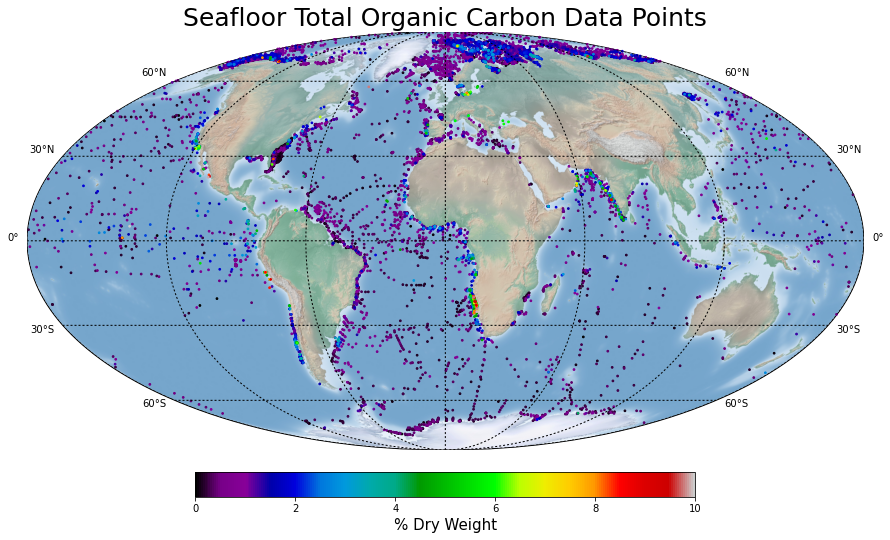

In [172]:
# TOTAL ORGANIC CARBON
x, y, z = get_data('observationdata/TOC_CascadesLee19Hayes_Obs_Curated.txt', 0, 10)
moll_map(x, y, z, 'Seafloor Total Organic Carbon Data Points', '% Dry Weight', 'plots/TOCobserved.png', 'nipy_spectral')

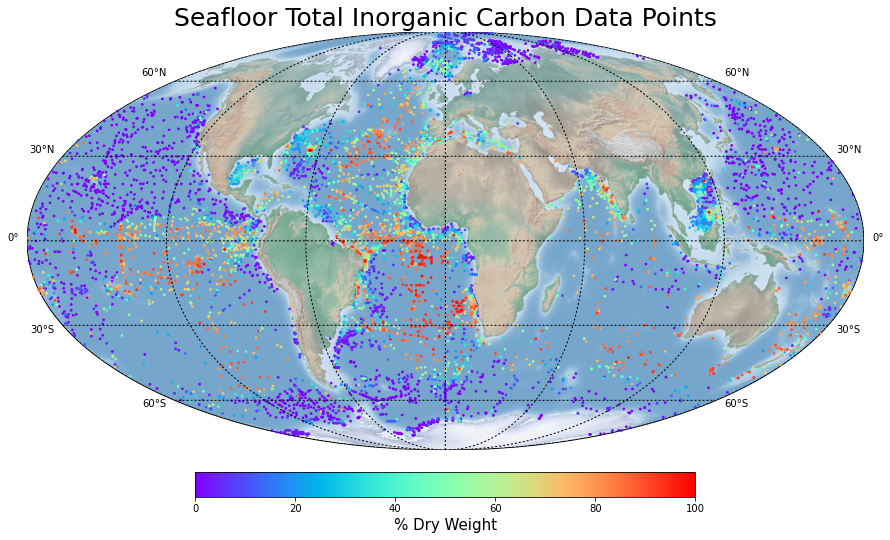

In [173]:
# TOTAL INORGANIC CARBON
x, y, z = get_data('observationdata/CaCO3_hayes.txt', 0, 100)
moll_map(x, y, z, 'Seafloor Total Inorganic Carbon Data Points', '% Dry Weight', 'plots/TICobserved.png', 'rainbow')

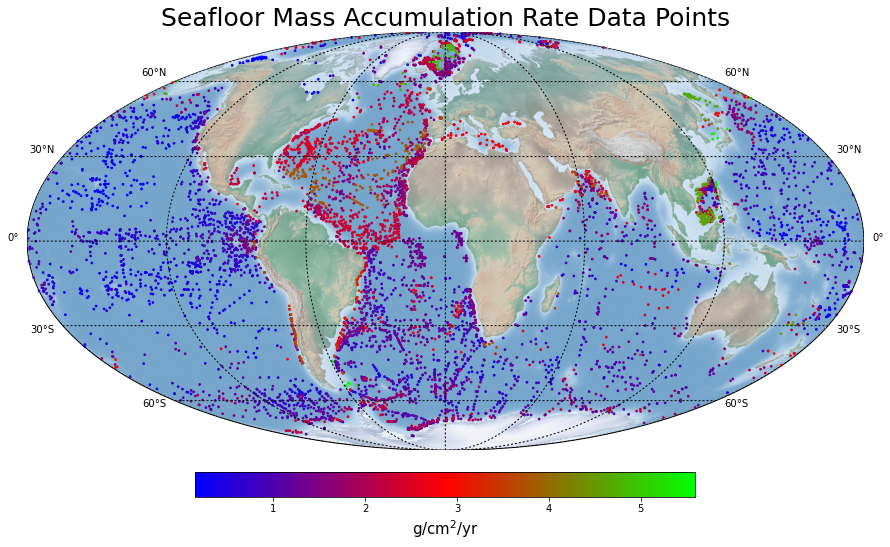

In [174]:
# Mass Accumulation Rate
x, y, z = get_data('observationdata/Mass_Flux_hayes.txt', 0, 6)
moll_map(x, y, z, 'Seafloor Mass Accumulation Rate Data Points', 'g/cm$^2$/yr', 'plots/MARobserved.png', 'brg')